Now let’s identify the various lines in each spectrum.

• Load the three spectra for neon into ds9. You will want to look at all three spectra
simultaneously, so after you load the first spectrum, do Frame/New Frame before
loading each of the other spectra. Then after all three spectra are loaded, do
Frame/Tile Frames and Frame/Frame Parameters/Tile/Rows. You should see your
three spectra in three rows.

• You may want to play with the scale settings for each image in ds9 in order to get
the lines visible. People often look at spectra using an inverted colormap (Color/
Invert Colormap).

• After you are done adjusting your images, do Frame/Match/Frame/Image to make
sure that all of the images are lined up in ds9. This allows you to directly compare
pixel number between the images.

• Save a plot of the three images (together) and be sure to make a note of which
image is which. You now know the orientation of wavelength along the x-axis of the
CCD.

• Now load the hydrogen spectrum into ds9. The dominant lines in the hydrogen
spectrum should be H-alpha at 656.285 nm and H-beta at 486.133 nm. Write
down the image x coordinate of the center (vertically and horizontally) of the Halpha
and H-beta lines. These are your first approximation to the calibration of the
spectrograph. Estimate the width of the line (in terms of number of pixels).

• Write down the image y coordinates of the center of the lines for use later. These
should be the same or very close to the same. Determine the width of the line
image in y. 

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from astropy.io import fits
colmap = plt.get_cmap('gray') # load gray colormap
basepath = "/Volumes/1TB Storage Drive/Desktop/masters/Observational-Techniques/spectroscopy_lab/michaels_data/"

s1raw = fits.open(basepath + 'H300s.FIT')[0].data
dark1 = fits.open(basepath + 'H300s_dark.FIT')[0].data

# do the dark subtraction
s1sub = s1raw-dark1

*You will now calibrate your spectrograph using Python and your hydrogen spectrum with
its newly identified lines.*

*In general, there can be a complex relation between pixel number p and diffraction angle θ
that depends on the optical properties of the spectrograph. If the diffraction angles are
small, θ << 1, then the relation between pixel number p and diffraction angle θ can be
approximated as p = aθ + b. We will use a linear relationship. Note that since there are
only two strong lines in the hydrogen spectrum, we don't actually have enough information
to derive a more complex calibration curve. In astronomical research, much larger line
sets, often 20 to 40 lines or more, are used to correct for non-linearities in the pixel number
versus wavelength relation.*

• *Grab the file hydrogen.py from Moodle and load it into your preferred text editor.
Edit the lines that read in the spectrum files to match the names of your files. Edit
the variable y0 to match the value that you found using ds9 for the (vertical) line
center and the variable dy to be half of the width of the line (or a bit smaller).*

• *Run the program. You should see a 2D image of the spectrum, similar to what you
saw in ds9 (you many want to edit the values for vmin and vmax in the plt.imshow
command if the lines don't show up well) and a line plot of a 1D spectrum. Adjust
y0, dy, vmin, and vmax until you are happy with the plots.*

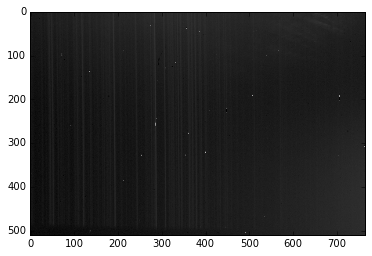

In [14]:
# adjust vmin and vmax based on spectrum
plt.imshow(s1sub, cmap=colmap, norm=LogNorm(vmin=200, vmax=6E5))
plt.show() # display the image

In [4]:
# Calculate a spectrum
# y0 is the center of the band over which the spectrum is extracted
y0 = 220
# dy sets the width of the band (y0-dy to y0+dy)
dy = 5
# figure out dimensions of spectrum image
(ny, nx) = shape(s1sub)
# find a 1-d spectrum by integrating across the band
s1 = zeros(nx)
for i in range(nx):
  s1[i] = sum(s1sub[(y0-dy):(y0+dy+1), i])

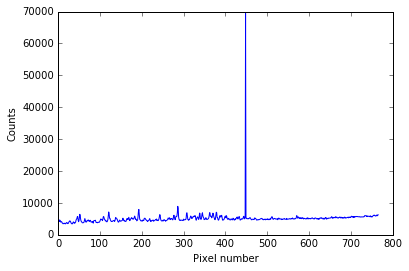

In [5]:
# plot the spectrum versus pixel number
p = 1+arange(len(s1)) # pixel numbers
plt.figure(2)
plt.xlabel('Pixel number')
plt.ylabel('Counts')
#plt.yscale('log')
#plt.axis([0, 750, 0, 1E5])
plt.plot(p, s1, '-b')
plt.show() # display the plot

• *Now edit the values in the arrays ‘linec’ and ‘lined’ to match the line centroids and
half the line widths that you estimated from ds9. Note that these values must be
integers. Make sure that the centroids correspond to the right wavelength in the
array ‘linew’.*

• *Run the program again. Inspect the vertical lines overdrawn on the 1D spectrum
plot. Each pair of dashed lines marks the interval used to calculate the centroid of a
spectral line. The solid line between them marks that centroid. Check your intervals
and centroids and adjust them so they look reasonable. The iPython plot windows
are interactive, so you can zoom in on your lines. Click on the cross with arrows, 
then left click in the plot window to pan and right click to zoom. Clicking on the
house will restore the plot to its original settings.*

• *When everything is good, run the program again save the 1D spectrum (versus
pixel number) plot.*

Line centroids in pixels
('center, range, mean = ', 172, 4, 173.03615367532757)
('center, range, mean = ', 485, 4, 485.9848820306385)


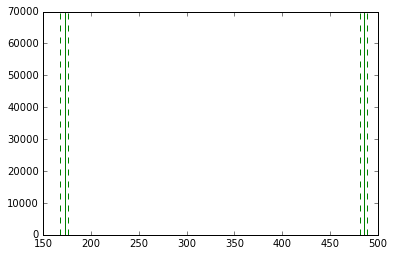

In [6]:
print('Line centroids in pixels')
# Calculate centroids for each line
linec = array([   172,     485]) # center of interval (pixel)
lined = array([     4,       4]) # width of interval (pixel)
linew = array([434.04, 486.133]) # wavelength of line (nm)# maximum value in spectrum (only for plotting)
smax = max(s1)
centroid = 0.0*linec
for i in range(len(linec)):
  # array elements included in this line
  k = range(linec[i]-lined[i], linec[i]+lined[i]+1)
  # find statistics for this line
  centroid[i] = sum(p[k]*s1[k])/sum(s1[k])
  plt.plot([centroid[i], centroid[i]], [0, smax], '-g')
  plt.plot([linec[i]-lined[i], linec[i]-lined[i]], [0, smax], '--g')
  plt.plot([linec[i]+lined[i], linec[i]+lined[i]], [0, smax], '--g')
  print('center, range, mean = ', linec[i], lined[i], centroid[i])
plt.show() # display the plot

• *After calculating the centroids, the program does a linear fit to the pixel versus
wavelength relation (which is trivial when only using two points). Rather than using
just two parameters as needed to specify a line, the program prints out three
parameters which are the average pixel number of the lines used in the calibration,
the corresponding wavelength, and the slope of the relation. Record these.*

• *The last part of the program applies the calibration, makes a spectrum plot versus
wavelength, and calculates centroids in terms of wavelength given a line list in
terms of wavelength. Inspect that plot. Adjust the values of ‘lined’ in the 'Line
centroids in wavelength' part. Save the plot when you are satisfied. Note that with
only two points for the calibration, the calculated wavelengths should match the
known values exactly. Once you have a calibration, specifying lines of interest in
terms of wavelength is much more convenient since the wavelengths are known
before hand.*

Calibration
('central pixel = ', 329.51051785298307)
('central wavelength = ', 460.0865)
('slope = ', 0.1664585770128307)


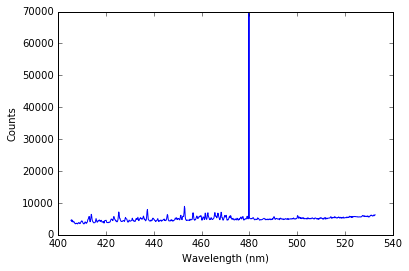

In [7]:
print('Calibration')
# calibration
centralp = mean(centroid)
centralw = mean(linew)
slope = (linew[1]-linew[0])/(centroid[1]-centroid[0])
print('central pixel = ', centralp)
print('central wavelength = ', centralw)
print('slope = ', slope)

# plot the spectrum versus wavelength
w = centralw + slope*(p-centralp)
plt.figure(3)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Counts')
#plt.yscale('log')
#plt.axis([0, 750, 0, 1E5])
plt.plot(w, s1, '-b')
plt.show() # display the plot

**Having now calibrated our spectrograph, we can test the accuracy of the calibration.**

• *Save a copy of hydrogen.py as spectra.py. Delete the stuff about plotting the
spectrum versus pixel number and finding line centroids in pixels (since we will now
be working in wavelength). You can also delete the stuff about plotting the
difference image if you like (or leave if it you like to double check you have the right
spectrum image). Replace the lines where the calibration is calculated with
statements that assign your calculated values to centralp, centralw, and slope.*

• *Run the program and checks that it work on the hydrogen spectrum and finds the
appropriate centroids.*

• *Now look at the helium spectrum. Edit the file name (and dark file if needed) to load
the helium spectrum. Find as many lines as you can (you may see more than 5).
You might want to change to a log scale on the vertical axis to see weak lines. It is
good to pick narrow lines, since the broad features are often combinations of
multiple lines and it is harder to accurately calculate the centroid of a broad line.*

• *You can get an estimate of the wavelength of by moving your cursor over it and
recording the x position at the bottom right of the plot window. Find your lines in
the Tables at http://physics.nist.gov/PhysRefData/Handbook/Tables/
heliumtable2.htm  If there are multiple lines close to your estimated wavelength,
pick the one with the highest intensity in the table. Edit the values for linew and
lined.*

Line centroids in wavelength (nm)
('wavelength = ', 434.2436547478517)
('wavelength = ', 486.14644381975234)


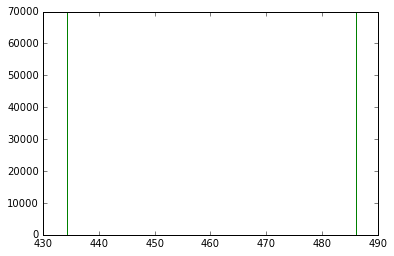

In [9]:
print('Line centroids in wavelength (nm)')
# calculate centroids for each line
# list of lines of interest
linew = array([434.04, 486.133]) # wavelength of line (nm)
lined = array([   2.0,     2.0]) # width of interval (nm)
# maximum value in spectrum (only for plotting)
smax = max(s1)
centroid = 0.0*linew
for i in range(len(linew)):
  # array elements included in this line
  wlow = linew[i]-lined[i]
  k0 = int(floor((wlow-centralw)/slope+centralp))
  whi = linew[i]+lined[i]
  k1 = int(ceil((whi-centralw)/slope+centralp))
  k = range(k0, k1)
  # find statistics for this line
  centroid[i] = sum(w[k]*s1[k])/sum(s1[k])
  plt.plot([centroid[i], centroid[i]], [0, smax], '-g')
  print('wavelength = ', centroid[i])
plt.show() # display the plot

• *Note that you really need to inspect each line. The centroiding code will always find
a centroid, even if there is no line present.  Indeed, if you draw an interval on a
region with no line, the centroid will be very close the center of the region, so it is
easy to get spurious good agreement between input wavelengths and centroids.*

• *After you have found five or so lines and calculated their centroids, save a plot of
your spectrum with all of the centroids overplotted.*

• *Take your centroids and calculate the difference (centroid - known wavelength) and
then the standard deviation of those differences. The standard deviation is a
measure of the accuracy of your calibration of the spectrograph. Calculate it in
wavelength units and also convert that number into pixels using the slope of your
calibration. Record your calculations.*

Hi folks, 

Well, it looks like all the spectra were taken in high dispersion mode. We really need a new hydrogen gas tube! I had a look, and the best set given this constraint were those taken on 12/5. The lab still works, but you’ll need to edit the linew values that show up twice in the hydrogen.py code: 

linew = array([486.133, 656.285]) # wavelength of line (nm) 

This should probably be: 

linew = array([434.04,486.133]) # wavelength of line (nm) 

In the spectrum, the bright line is H-beta, and you can also see H-gamma, some non-hydrogen garbage line, and H-delta. 

In the helium spectrum, the bright line at far right is the 501nm line.

